

# Mechouma Toufik - MECT31058501 - DIC9351 - A2020

## DATASET 1 : Red wine classification - UCI
* le Dataset est lié aux échantillons de vin rouge, du nord du Portugal. L'objectif est de modéliser la qualité du vin à partir de tests physico-chimiques - ca peut être fait comme régression ou classification, nous avons choisi la classification dans le présent travail.
* http://archive.ics.uci.edu/ml/datasets/Wine+Quality
* Nombre de lignes : 1559
* Nombre d'attribut : 12
* Type de valeur : Réel
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Justification du choix du DataSet : 
* Nous avons opté pour ce Dataset vue que le type des données est réel avec un nombre considérable de lignes pour observer le comportement des différents algorithmes par apport a ce type de données  (Réel)


In [1]:
# importation des bibliothèques Pandas et Numpy
import pandas as pd
import numpy as np

In [2]:
# Lecture du contenu du fichier csv a l'aide du Pandas 
data = pd.read_csv('winequality-red.csv',sep =';')

In [3]:
# affichage du format (lignes,colones)
data.shape

(1599, 12)

In [4]:
# Récupération des Labels dans y
y = data['quality']
# Récupération des données dans x
x = data.drop(['quality'],axis=1)

In [5]:
# importation du module responsable de la division du jeu de données
from sklearn.model_selection import train_test_split

In [6]:
#  Apprentissage 80% et test 20% ,fixation du mexage du jeu de données pour tous les algorithmes de classification
train_features,test_features,train_labels,test_labels= train_test_split(x,y,test_size = 0.2,random_state=42)
print('Training features :',train_features.shape)
print('Training labels :',train_labels.shape)
print('Test features :',test_features.shape)
print('Test labels :',test_labels.shape)

Training features : (1279, 11)
Training labels : (1279,)
Test features : (320, 11)
Test labels : (320,)


In [7]:
# chargement du module Arbre de décision 
from sklearn.tree import DecisionTreeClassifier

In [8]:
# apprentissage de l'arbre de décision
tr = DecisionTreeClassifier().fit(train_features,train_labels)

In [9]:
# Récupération et mesure de précision de l'arbre de décision 
score_tr = tr.score(test_features,test_labels)

In [10]:
score_tr

0.575

In [11]:
# prediction 
predicted_labels = tr.predict(test_features)

In [12]:
# Récupération et mesure de la performance de l'arbre de décision à l'aide de la métric f1-score
from sklearn.metrics import f1_score
performance_tr = f1_score(test_labels,predicted_labels,average=None)

In [13]:
performance_tr

array([0.        , 0.11111111, 0.66420664, 0.54901961, 0.51764706,
       0.22222222])

# Bagging

In [14]:
# chargement du module BaggingClassifier (Bootstrapping aggregator)
from sklearn.ensemble import BaggingClassifier
# Détermination du type des estimateurs en tant qu'arbre de décision, ainsi que le nombre des estimateurs à 40 après tests de précision
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=40)

In [15]:
# Apprentissage du modèle Bagging
bg.fit(train_features,train_labels)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [16]:
# Récupération et mesure de la précision du Bagging
score_bg = bg.score(test_features,test_labels)

In [17]:
score_bg 

0.6375

In [18]:
predicted_labels = bg.predict(test_features)

In [19]:
# Mesure et récupération de la performance du Bagging 
performance_bg = f1_score(test_labels,predicted_labels,average=None)
performance_bg

d:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.        , 0.71794872, 0.61818182, 0.56756757,
       0.        ])

# Random Forest

In [20]:
# chargement du module Random Forest
from sklearn.ensemble import RandomForestClassifier
# Instanciation du classification Random Forest ainsi que la détermination du nombre des estimateurs
rf = RandomForestClassifier(n_estimators=30)

In [21]:
# apprentissage du modèle Random Forest
rf.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# Récupération et mesure de la précision du classificateur Random Forest
score_rf = rf.score(test_features,test_labels)

In [23]:
score_rf

0.671875

In [24]:
# Prédiction a l'aide du modèle Random Forest
predicted_labels = rf.predict(test_features)

In [25]:
# Récupération et mesure de la performance du modèle Random Forest
performance_rf = f1_score(test_labels,predicted_labels,average=None)
performance_rf

d:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.        , 0.75276753, 0.66906475, 0.54054054,
       0.        ])

# AdaBoost

In [26]:
# Chargement du module du classificateur AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Instanciation du classificateur AdaBoost ainsi que la détermination du nombre des estimateurs et le taux d'apprentissage après essais par apport a la précision
ab = AdaBoostClassifier(n_estimators=100,learning_rate=0.05)

In [27]:
# Apprentissage du classificateur AdaBoost
ab.fit(train_features,train_labels)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=100, random_state=None)

In [28]:
# Récupération et mesure de la précision du classificateur AdaBoost
score_ab = ab.score(test_features,test_labels)

In [29]:
score_ab

0.565625

In [30]:
# Prédiction à l'aide du classificateur entrainé AdaBoost
predicted_labels = ab.predict(test_features)

In [31]:
# Récupération et Mesure de la performance du classificateur AdaBoost
performance_ab = f1_score(test_labels,predicted_labels,average = None)
performance_ab

d:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.        , 0.64257028, 0.5875    , 0.25454545,
       0.        ])

# Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
mnb = MultinomialNB()

In [34]:
mnb.fit(train_features,train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
score_mnb = mnb.score(test_features,test_labels)
score_mnb

0.475

In [36]:
predicted_labels = mnb.predict(test_features)

In [37]:
performance_mnb = f1_score(test_labels,predicted_labels,average=None)
performance_mnb

d:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.        , 0.55      , 0.51405622, 0.32592593,
       0.        ])

# Réseau de neurones

In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
mp = MLPClassifier(hidden_layer_sizes=(6,6,6,6),activation='relu',solver='adam', max_iter=500)

In [40]:
mp.fit(train_features,train_labels)

d:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 6, 6, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
score_mp = mp.score(test_features,test_labels)
score_mp

0.546875

In [42]:
predicted_labels = mp.predict(test_features)

In [43]:
performance_mp = f1_score(test_labels,predicted_labels,average=None)
performance_mp

d:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.        , 0.64259928, 0.53380783, 0.33333333,
       0.        ])

In [44]:
# Affichage comparatif des taux de précisions des différents algorithmes 
from matplotlib import pyplot as plt

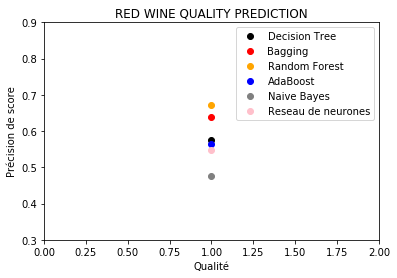

In [49]:
plt.figure()
plt.plot(1,score_tr, 'ro',c = 'black',label = 'Decision Tree')
plt.plot(1,score_bg, 'ro', c = 'red',label = 'Bagging')
plt.plot(1,score_rf, 'ro', c = 'orange',label = 'Random Forest')
plt.plot(1,score_ab, 'ro', c = 'blue',label = 'AdaBoost')
plt.plot(1,score_mnb, 'ro', c = 'gray',label = 'Naive Bayes')
plt.plot(1,score_mp, 'ro', c = 'pink',label = 'Reseau de neurones')
plt.title('RED WINE QUALITY PREDICTION')
plt.axis([0,2,0.3,0.9])
plt.xlabel('Qualité')
plt.ylabel('Précision de score')
plt.legend()
plt.savefig('score.png')

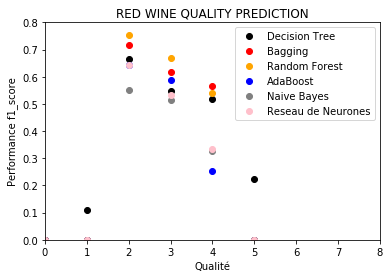

In [50]:
# Affichage comparatif des différents performances des algorithmes
plt.figure()
plt.plot(performance_tr, 'ro',c = 'black',label = 'Decision Tree')
plt.plot(performance_bg, 'ro', c = 'red',label = 'Bagging')
plt.plot(performance_rf, 'ro', c = 'orange',label = 'Random Forest')
plt.plot(performance_ab, 'ro', c = 'blue',label = 'AdaBoost')
plt.plot(performance_mnb, 'ro', c = 'gray',label = 'Naive Bayes')
plt.plot(performance_mp, 'ro', c = 'pink',label = 'Reseau de Neurones')
plt.title('RED WINE QUALITY PREDICTION')
plt.axis([0, 8,0,0.8])
plt.xlabel('Qualité')
plt.ylabel('Performance f1_score')
plt.legend()
plt.savefig('performances.png')